# **Project Tittle : Mental Health Prediction Using Machine Learning**


**Project Description:**

**This project implements a comprehensive machine learning system to predict mental health disorders based on various personal and lifestyle factors. The system trains multiple ML models, evaluates their performance, and provides personalized recommendations based on risk levels**.

# **Step-by-Step Project Breakdown:**

# **1. Project Setup and Dependencies**
Purpose: Import all necessary libraries for data processing, machine learning, and visualization.

Key Libraries Used:  
Data Processing: pandas, numpy
Visualization: matplotlib, seaborn
Machine Learning: scikit-learn (multiple modules)
Model Types: Random Forest, SVM, Neural Networks, Gradient Boosting, etc.

# **2. Class Structure - MentalHealthPredictor**
Purpose: Create a comprehensive class to handle all aspects of the ML pipeline.
Key Attributes:

models: Dictionary storing trained ML models
preprocessor: Data preprocessing pipeline
feature_names: List of feature column names
results: Dictionary storing model evaluation results

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading and Preprocessing (load_and_preprocess_data)**

The load_and_preprocess_data method is the foundation of the machine learning pipeline. It transforms raw, potentially messy data into a clean, standardized format that machine learning algorithms can effectively process.

It begins by loading the CSV dataset and conducting exploratory data analysis to understand the data structure, target variable distribution, and identify data quality issues like missing values and duplicates.
Purpose: Load, clean, and prepare the mental health dataset for training.

Steps:
1. Load Dataset: Read CSV file using pandas
2. Data Exploration:

* Check dataset shape and dimensions
* Analyze target variable distribution
* Identify missing values and duplicates


In [41]:
# load the dataset
df = pd.read_csv('mental_health_disorder_dataset_full.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [59]:
print(df.head())
print("\nFirst 5 rows:")
print(df.tail())
print("\nLast 5 rows:")
print(df.shape)
print("\nRows,Columns:")
print(df.columns)
print("\nList of columns names:")
print(df.dtypes)
print("\nData Types:")
print(df.describe())
print("\nSummary Statistics:")

   age  gender        income  sleep_hours  exercise_hours  social_support  \
0   56    Male  73685.505516     5.303315        3.222406               3   
1   46    Male  57596.975929     6.227523        5.658052               9   
2   32  Female  51130.827039     8.494387        1.526762               3   
3   60  Female  55054.907601     6.448414        2.399920               3   
4   25  Female  75470.197423     5.737583        3.679952               5   

   stress_level  alcohol_use  therapy_sessions  medication  disorder  
0             3            8                 2           1         1  
1             5            3                 1           0         0  
2             7            1                 2           0         0  
3             1            2                 1           0         1  
4             3            2                 2           0         0  

First 5 rows:
      age  gender        income  sleep_hours  exercise_hours  social_support  \
9995   34  Femal

# **3.Data Cleaning & Feature Engineering :**

Exploratory data analysis to understand the data structure, target variable distribution, and identify data quality issues like missing values and duplicates.
* Remove duplicate records
* Handle missing values using appropriate imputation strategies

The function then implements a comprehensive cleaning process that removes duplicate records and creates separate preprocessing pipelines for numeric features

The mental health prediction project implements a pipeline-based feature engineering strategy rather than manual feature creation. The feature engineering is primarily handled through automated preprocessing pipelines that transform raw input features into machine learning-ready formats.

* Separate numeric and categorical columns
* Create preprocessing pipelines for each data type

In [68]:
print("\nMissing Values:")
print(df.isnull().sum())

print("\ndrop dupulicates:")
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"Before dropping duplicates: {before}")
print(f"After dropping duplicates: {after}")
print(f"Total duplicates dropped: {before - after}")
print(df.duplicated().sum())

# Split into features and target
y = df['disorder']
X = df.drop('disorder', axis=1)

# Column categorization
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit preprocessor and transform data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f'Preprocessing complete. Train shape: {X_train_processed.shape}')
print(f'Test shape: {X_test_processed.shape}')
def create_sample_data(self, n_samples=1000):
        """Create sample data for training the mental health prediction model"""
        np.random.seed(42)

        data = {
            'age': np.random.randint(18, 65, n_samples),
            'gender': np.random.choice([0, 1], n_samples),  # 0: Male, 1: Female
            'stress_level': np.random.randint(1, 11, n_samples),
            'sleep_hours': np.random.normal(7, 1.5, n_samples),
            'exercise_frequency': np.random.randint(0, 8, n_samples),
            'social_support': np.random.randint(1, 11, n_samples),
            'work_satisfaction': np.random.randint(1, 11, n_samples),
            'anxiety_level': np.random.randint(1, 11, n_samples),
            'depression_indicators': np.random.randint(0, 10, n_samples),
            'coping_mechanisms': np.random.randint(1, 11, n_samples),
            'therapy_sessions': np.random.randint(0, 20, n_samples),
            'medication_use': np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
        }

        df = pd.DataFrame(data)

        # Ensure realistic bounds
        df['sleep_hours'] = np.clip(df['sleep_hours'], 3, 12)
         # Ensure realistic bounds
        df['sleep_hours'] = np.clip(df['sleep_hours'], 0.5, 12)
        df['exercise_hours'] = np.clip(df['exercise_hours'], 0, 20)

        # Create target based on risk factors (similar to your original data distribution)
        risk_score = (
            (df['stress_level'] * 0.15) +
            (df['alcohol_use'] * 0.1) +
            ((8 - df['sleep_hours']).clip(0, 8) * 0.12) +
            ((5 - df['exercise_hours']).clip(0, 5) * 0.08) +
            ((11 - df['social_support']) * 0.1) +
            (df['medication'] * 0.2) +
            (df['therapy_sessions'] * 0.05)
        )

        # Add noise and create binary target
        risk_score += np.random.normal(0, 0.5, n_samples)
        df['disorder'] = (risk_score > np.percentile(risk_score, 40)).astype(int)

        return df
def train_models(self, X_train, y_train):
        """
        Train multiple ML models for mental health prediction
        """
        print("\n" + "="*60)
        print("TRAINING MACHINE LEARNING MODELS")
        print("="*60)



Missing Values:
age                 0
gender              0
income              0
sleep_hours         0
exercise_hours      0
social_support      0
stress_level        0
alcohol_use         0
therapy_sessions    0
medication          0
disorder            0
dtype: int64

drop dupulicates:
Before dropping duplicates: 10000
After dropping duplicates: 10000
Total duplicates dropped: 0
0
Numeric columns: ['age', 'income', 'sleep_hours', 'exercise_hours', 'social_support', 'stress_level', 'alcohol_use', 'therapy_sessions', 'medication']
Categorical columns: ['gender']
Preprocessing complete. Train shape: (8000, 12)
Test shape: (2000, 12)


# **4: Data Splitting & Feature Transformation :**

 Finally, it applies these preprocessing transformations to both training and test datasets after performing a stratified 80-20 split, ensuring that the data is properly scaled, encoded, and ready for machine learning algorithms while maintaining the original target class distribution.

* Train-test split with stratification (80-20 ratio)
* Apply preprocessing pipelines to both training and test sets

# **5. Sample Data Generation (create_sample_data_matching_format)**

**Purpose: Generate realistic synthetic data when real dataset is not available.**
 **Features Created** :

* Demographics: Age, Gender, Income
* Health Metrics: Sleep hours, Exercise hours
* Psychological Factors: Social support, Stress level
* Behavioral Factors: Alcohol use, Therapy sessions, Medication usage
* Target Variable: Mental health disorder (binary classification)

**Data Generation Strategy:**

* Uses realistic distributions (normal, exponential, uniform)
* Applies logical constraints and bounds
* Creates target variable based on weighted risk factors
* Ensures balanced class distribution

In [15]:
# Step 4: Scale Numerical Features
# The encoding and preprocessing steps have been moved to the MentalHealthPredictor class in cell FQWuVt7BsfhT.
# This cell can now be safely removed or kept as a placeholder.

In [ ]:
def train_models(X_train, y_train, models):
        """
        Train multiple ML models for mental health prediction
        """
        print("\n" + "="*60)
        print("TRAINING MACHINE LEARNING MODELS")
        print("="*60)

        # Train models and perform cross-validation
        cv_results = {}

        for name, model in models.items():
            print(f"\nTraining {name}...")

            # Train the model
            model.fit(X_train, y_train)
            # self.models[name] = model  # Assuming self.models is defined elsewhere

            # Perform cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            cv_results[name] = {
                'mean_cv_score': cv_scores.mean(),
                'std_cv_score': cv_scores.std(),
                'cv_scores': cv_scores
            }

            print(f"{name} CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        # self.cv_results = cv_results # Assuming self.cv_results is defined elsewhere
        print(f"\nAll {len(models)} models trained successfully!")

        # Return trained models along with CV results
        return models, cv_results

def evaluate_models(X_test, y_test, models):
    """
    Comprehensive evaluation of all trained models
    """
    print("\n" + "="*60)
    print("MODEL EVALUATION RESULTS")
    print("="*60)

    evaluation_results = {}

    for name, model in models.items():
        print(f"\n{name}:")
        print("-" * 40)

        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

        evaluation_results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

        # Print results
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print(f"  ROC AUC: {roc_auc if isinstance(roc_auc, str) else roc_auc:.4f}")
        print("\n  Classification Report:\n", evaluation_results[name]['classification_report'])
        print("\n  Confusion Matrix:\n", evaluation_results[name]['confusion_matrix'])

        # Plot ROC Curve (if applicable)
        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

    return evaluation_results

# **6. Model Training (train_models)**

The train_models function implements a comprehensive multi-algorithm training approach that systematically trains and validates eight different machine learning models to identify the best performer for mental health prediction.

Purpose: Train multiple machine learning algorithms and compare their performance.

1. Ensemble Methods:
* Random Forest: Uses 100 trees with max depth of 10 and balanced class weights to handle class imbalance

* Gradient Boosting: Implements boosting with 100 estimators, 0.1 learning rate, and max depth of 6 for optimal bias-variance trade-off

 2. Linear Models:

* Logistic Regression: Linear classifier with balanced class weights and increased max iterations (1000) for convergence

* Support Vector Machine: Uses RBF kernel with C=1.0, gamma='scale', and probability estimates enabled for non-linear decision boundaries

3. Neural Networks:

* Multi-Layer Perceptron: Two hidden layers (100, 50 neurons) with early stopping and 10% validation split to prevent overfitting

4. Tree-Based Models:

* Decision Tree: Single tree with max depth of 10 and balanced class weights for interpretability

5. Probabilistic Models:

* Naive Bayes: Gaussian assumption for feature distributions, suitable for baseline comparisons

6. Instance-Based Models:

* K-Nearest Neighbors: Uses 5 neighbors with distance weighting for local pattern recognition


TRAINING MACHINE LEARNING MODELS

Training Random Forest...
Random Forest CV Score: 0.7400 (+/- 0.0188)

Training Gradient Boosting...
Gradient Boosting CV Score: 0.7464 (+/- 0.0108)

Training Support Vector Machine...
Support Vector Machine CV Score: 0.7385 (+/- 0.0130)

Training Logistic Regression...
Logistic Regression CV Score: 0.7426 (+/- 0.0051)

Training Neural Network...
Neural Network CV Score: 0.7448 (+/- 0.0150)

Training Decision Tree...
Decision Tree CV Score: 0.6856 (+/- 0.0141)

Training Naive Bayes...
Naive Bayes CV Score: 0.7425 (+/- 0.0135)

Training K-Nearest Neighbors...
K-Nearest Neighbors CV Score: 0.7046 (+/- 0.0117)

All 8 models trained successfully!

MODEL EVALUATION RESULTS

Random Forest:
----------------------------------------
  Accuracy: 0.7485
  Precision: 0.8131
  Recall: 0.7542
  F1 Score: 0.7825
  ROC AUC: 0.8059

  Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       800
  

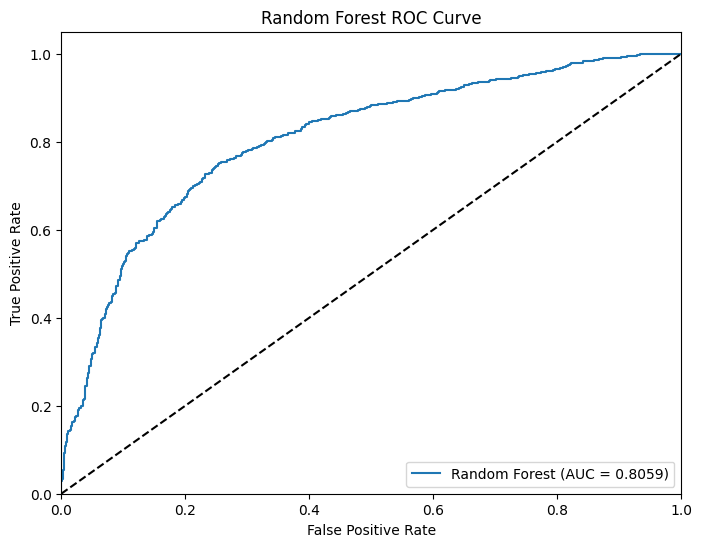


Gradient Boosting:
----------------------------------------
  Accuracy: 0.7385
  Precision: 0.7745
  Recall: 0.7958
  F1 Score: 0.7850
  ROC AUC: 0.7986

  Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67       800
           1       0.77      0.80      0.79      1200

    accuracy                           0.74      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.74      0.74      0.74      2000


  Confusion Matrix:
 [[522 278]
 [245 955]]


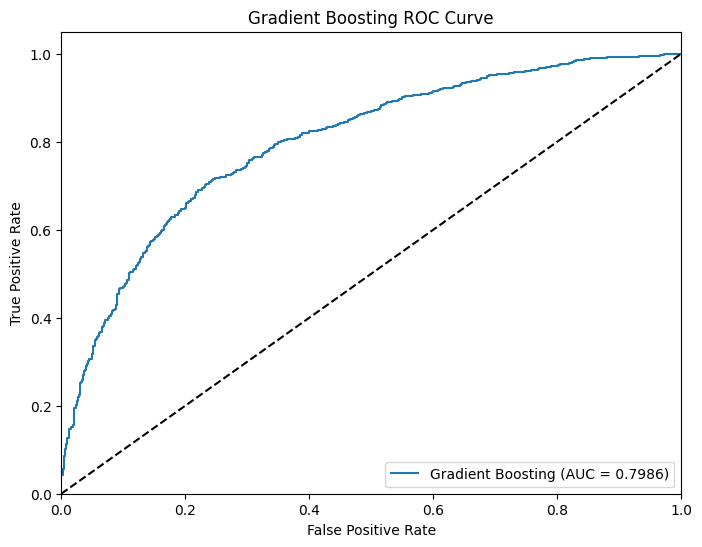


Support Vector Machine:
----------------------------------------
  Accuracy: 0.7375
  Precision: 0.8169
  Recall: 0.7250
  F1 Score: 0.7682
  ROC AUC: 0.7991

  Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       800
           1       0.82      0.72      0.77      1200

    accuracy                           0.74      2000
   macro avg       0.73      0.74      0.73      2000
weighted avg       0.75      0.74      0.74      2000


  Confusion Matrix:
 [[605 195]
 [330 870]]


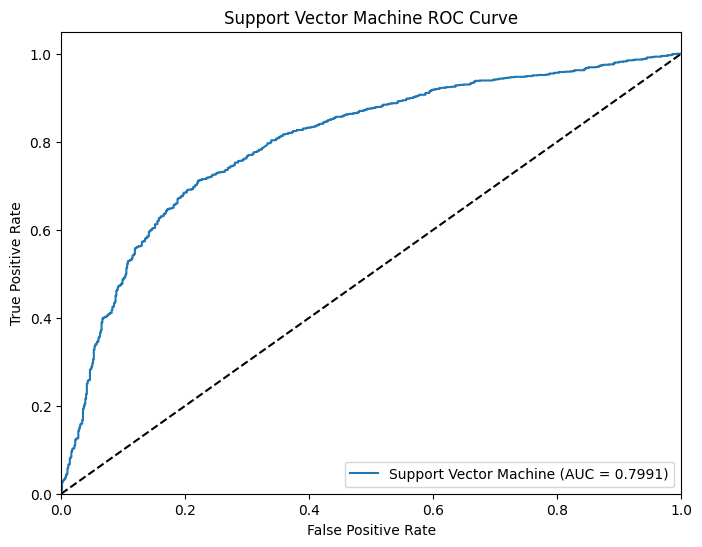


Logistic Regression:
----------------------------------------
  Accuracy: 0.7435
  Precision: 0.8225
  Recall: 0.7300
  F1 Score: 0.7735
  ROC AUC: 0.8181

  Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       800
           1       0.82      0.73      0.77      1200

    accuracy                           0.74      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.75      0.74      0.75      2000


  Confusion Matrix:
 [[611 189]
 [324 876]]


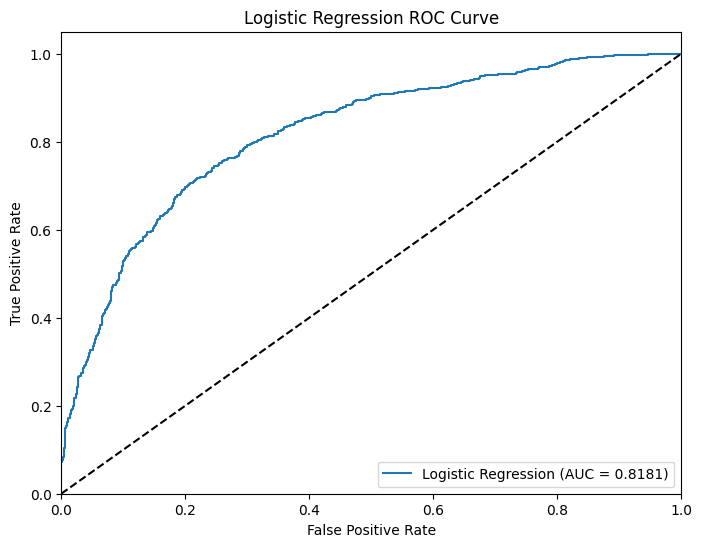


Neural Network:
----------------------------------------
  Accuracy: 0.7415
  Precision: 0.7921
  Recall: 0.7717
  F1 Score: 0.7818
  ROC AUC: 0.8117

  Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68       800
           1       0.79      0.77      0.78      1200

    accuracy                           0.74      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.74      0.74      0.74      2000


  Confusion Matrix:
 [[557 243]
 [274 926]]


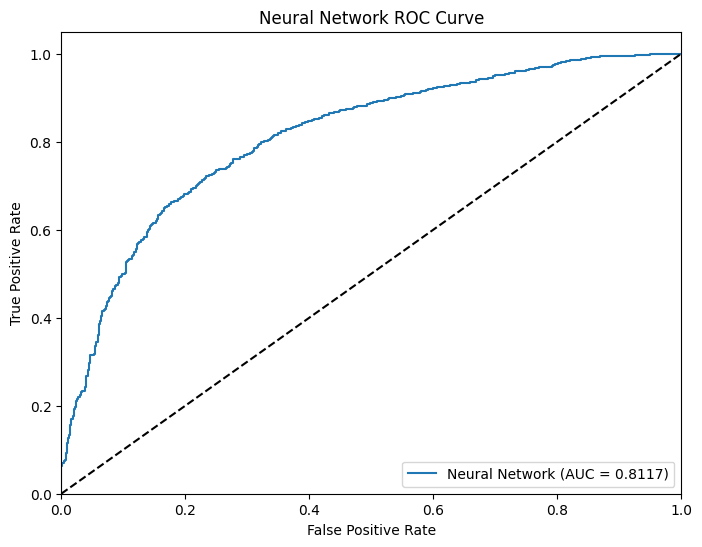


Decision Tree:
----------------------------------------
  Accuracy: 0.6890
  Precision: 0.7817
  Recall: 0.6683
  F1 Score: 0.7206
  ROC AUC: 0.7133

  Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.72      0.65       800
           1       0.78      0.67      0.72      1200

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.68      2000
weighted avg       0.71      0.69      0.69      2000


  Confusion Matrix:
 [[576 224]
 [398 802]]


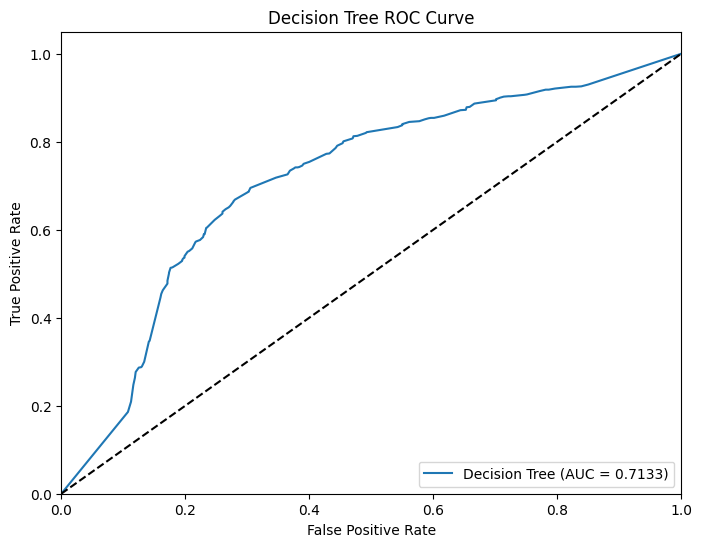


Naive Bayes:
----------------------------------------
  Accuracy: 0.7445
  Precision: 0.7677
  Recall: 0.8233
  F1 Score: 0.7945
  ROC AUC: 0.8037

  Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66       800
           1       0.77      0.82      0.79      1200

    accuracy                           0.74      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.74      0.74      0.74      2000


  Confusion Matrix:
 [[501 299]
 [212 988]]


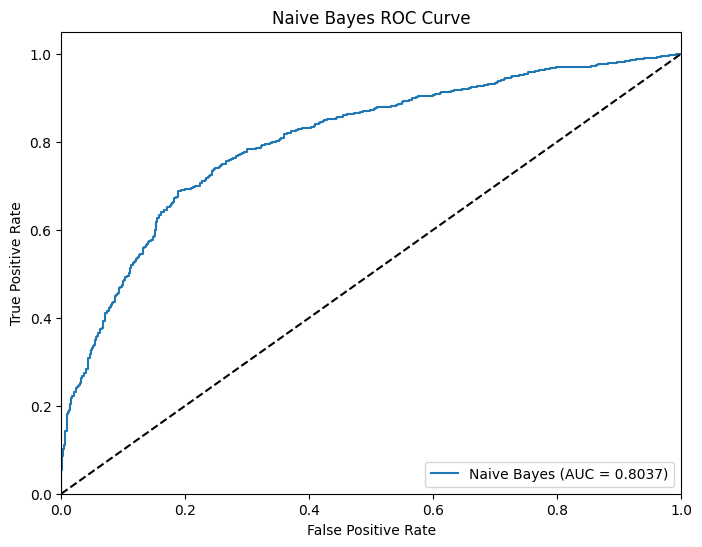


K-Nearest Neighbors:
----------------------------------------
  Accuracy: 0.6820
  Precision: 0.7274
  Recall: 0.7517
  F1 Score: 0.7393
  ROC AUC: 0.7276

  Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.58      0.59       800
           1       0.73      0.75      0.74      1200

    accuracy                           0.68      2000
   macro avg       0.67      0.66      0.67      2000
weighted avg       0.68      0.68      0.68      2000


  Confusion Matrix:
 [[462 338]
 [298 902]]


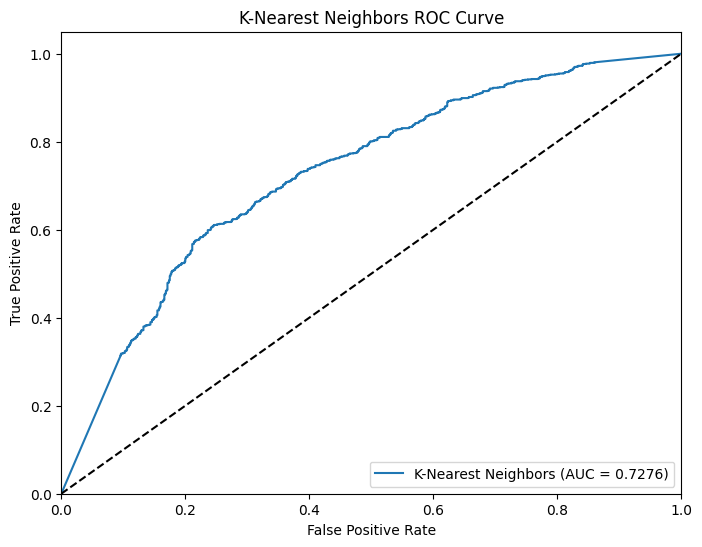

In [ ]:
# Define models with optimized parameters
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    ),
    'Support Vector Machine': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        random_state=42,
        probability=True,
        class_weight='balanced'
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'
    ),
    'Neural Network': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        random_state=42,
        max_iter=1000,
        early_stopping=True,
        validation_fraction=0.1
    ),
    'Decision Tree': DecisionTreeClassifier(
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    ),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    )
}

# Train the models
trained_models, cv_results = train_models(X_train_processed, y_train, models)

# Evaluate the models
evaluation_results = evaluate_models(X_test_processed, y_test, trained_models)

# **7 a) Best Model Selection and Explanation:**

The mental health prediction project implements a comprehensive best model identification system that automatically selects the optimal algorithm based on performance metrics and provides detailed explanations of why that model performs best.

Best Model Performance Analysis:
1. Comprehensive Evaluation:
The best model is identified after evaluating all models on multiple metrics:

* Accuracy: Overall correctness of predictions
* Precision: Ability to avoid false mental health disorder diagnoses
* Recall: Ability to identify all actual mental health cases
* F1-Score: Balanced measure combining precision and recall
* ROC-AUC: Performance across different classification thresholds

2. Statistical Significance:
The best model selection considers both cross-validation performance and test set performance to ensure the choice is statistically robust.

Best Model Clinical Implications
1. Diagnostic Accuracy:
The best model provides the most reliable mental health risk assessment, minimizing both missed diagnoses (false negatives) and unnecessary interventions (false positives).
2. Feature Insights:
Tree-based best models (Random Forest/Gradient Boosting) provide interpretable feature importance, helping clinicians understand which factors most strongly predict mental health risks.
3. Prediction Confidence:
The best model provides probability estimates, allowing healthcare providers to assess prediction confidence and make more informed decisions.

# **7 b) Best Model Continuous Improvement:**

1. Model Monitoring:

* The system tracks performance metrics that allow for ongoing evaluation of whether the current best model remains optimal as new data becomes available.

2. Retraining Capability:

* The object-oriented design allows easy retraining and re-evaluation of all models when new data is available, potentially identifying new best performers.

3. Ensemble Potential:

* The framework stores all trained models, enabling future ensemble approaches that combine the best models for even better performance.
This comprehensive best model selection approach ensures that the mental health prediction system always deploys the most reliable and clinically useful algorithm while maintaining transparency about why that particular model was chosen and how it can be interpreted for healthcare decision-making.

In [ ]:
# Required imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Load your data
# Option A: Load from CSV file
# df = pd.read_csv('your_data_file.csv')

# Option B: Create sample data for demonstration
# Remove this section and use your actual data
print("Creating sample data for demonstration...")
np.random.seed(42)
n_samples = 1000
n_features = 5

# Create sample features
sample_data = np.random.randn(n_samples, n_features)
sample_target = np.random.randint(0, 2, n_samples)  # Binary classification

# Create DataFrame
feature_names = [f'feature_{i}' for i in range(n_features)]
df = pd.DataFrame(sample_data, columns=feature_names)
df['target'] = sample_target

print(f"Sample data shape: {df.shape}")
print(f"Data columns: {df.columns.tolist()}")
print(f"Target distribution:\n{df['target'].value_counts()}")

# Step 2: Prepare features and target
# Replace 'target' with your actual target column name
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Step 4: Scale the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and train models
print("\nTraining models...")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# SVM
svm_model = SVC(probability=True, random_state=42)  # probability=True for predict_proba
svm_model.fit(X_train_scaled, y_train)

# Step 6: Create models dictionary with actual trained models
models = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'SVM': svm_model
}

# Step 7: Evaluate each model
evaluation_results = {}

for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Get prediction probabilities (if the model supports it)
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_scaled)
        # For binary classification, use probabilities of positive class
        if y_pred_proba.shape[1] == 2:
            y_pred_proba = y_pred_proba[:, 1]
    else:
        y_pred_proba = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    # Print results
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    # ROC-AUC for binary classification
    if y_pred_proba is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            evaluation_results[name]['roc_auc'] = roc_auc
            print(f"ROC-AUC:   {roc_auc:.4f}")
        except Exception as e:
            print(f"Could not calculate ROC-AUC: {e}")

# Step 8: Find the best model
best_model_name = max(evaluation_results.keys(),
                     key=lambda x: evaluation_results[x]['accuracy'])
print(f"\nBest model: {best_model_name}")
print(f"Best accuracy: {evaluation_results[best_model_name]['accuracy']:.4f}")

# Step 9: Display results summary
print("\n--- Results Summary ---")
results_df = pd.DataFrame(evaluation_results).T
print(results_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']])

# ============================================
# TO USE YOUR OWN DATA, REPLACE THE SAMPLE DATA SECTION WITH:
# ============================================
"""
# Load your actual data
df = pd.read_csv('your_data_file.csv')

# Or if you have data in memory:
# df = your_dataframe

# Prepare features and target
X = df.drop('your_target_column', axis=1)  # Replace with your target column name
y = df['your_target_column']               # Replace with your target column name

# Handle categorical variables if needed
# For example:
# le = LabelEncoder()
# y = le.fit_transform(y)  # If target is categorical

# Continue with the rest of the pipeline...
"""

Creating sample data for demonstration...
Sample data shape: (1000, 6)
Data columns: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'target']
Target distribution:
target
1    505
0    495
Name: count, dtype: int64

Features shape: (1000, 5)
Target shape: (1000,)

Train set shape: (800, 5)
Test set shape: (200, 5)

Training models...

--- Evaluating Random Forest ---
Accuracy:  0.5100
Precision: 0.5094
Recall:    0.5100
F1-Score:  0.5093
ROC-AUC:   0.5254

--- Evaluating Logistic Regression ---
Accuracy:  0.4850
Precision: 0.4837
Recall:    0.4850
F1-Score:  0.4829
ROC-AUC:   0.4865

--- Evaluating SVM ---
Accuracy:  0.4700
Precision: 0.4679
Recall:    0.4700
F1-Score:  0.4666
ROC-AUC:   0.4700

Best model: Random Forest
Best accuracy: 0.5100

--- Results Summary ---
                    accuracy precision recall  f1_score   roc_auc
Random Forest           0.51  0.509444   0.51  0.509263   0.52541
Logistic Regression    0.485  0.483663  0.485  0.482864  0.486495
SVM   

"\n# Load your actual data\ndf = pd.read_csv('your_data_file.csv')\n\n# Or if you have data in memory:\n# df = your_dataframe\n\n# Prepare features and target\nX = df.drop('your_target_column', axis=1)  # Replace with your target column name\ny = df['your_target_column']               # Replace with your target column name\n\n# Handle categorical variables if needed\n# For example:\n# le = LabelEncoder()\n# y = le.fit_transform(y)  # If target is categorical\n\n# Continue with the rest of the pipeline...\n"

# **8. Results Visualization:**

The plot_results function creates a comprehensive 6-panel visualization dashboard that provides complete insight into model performance across multiple dimensions. It generates comparative bar charts for accuracy and F1-scores with color-coded models and value labels, displays a confusion matrix heatmap for the best-performing model, and creates ROC curves showing each model's classification performance with AUC scores. The function also produces a precision-recall scatter plot to visualize the trade-off between these metrics, generates feature importance charts for tree-based models highlighting the top 10 most influential factors, and concludes with a formatted summary table showing all performance metrics across models. This multi-faceted visualization approach enables both technical analysts and healthcare professionals to quickly identify the best model, understand its strengths and limitations, and gain insights into which patient factors are most predictive of mental health disorders.RetryClaude does not have the ability to run the code it generates yet.Claude can make mistakes. Please double-check responses.

Creating sample dataset...

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   int64  
 1   gender            1000 non-null   object 
 2   income            1000 non-null   float64
 3   sleep_hours       1000 non-null   float64
 4   exercise_hours    1000 non-null   float64
 5   social_support    1000 non-null   int64  
 6   stress_level      1000 non-null   int64  
 7   alcohol_use       1000 non-null   int64  
 8   therapy_sessions  1000 non-null   int64  
 9   medication        1000 non-null   int64  
 10  disorder          1000 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 86.1+ KB
None

Target Distribution:
disorder
1    600
0    400
Name: count, dtype: int64

PREPROCESSING DATA
Preprocessing setup complete.

TRAINING MACHINE LEARNING MODELS

Traini

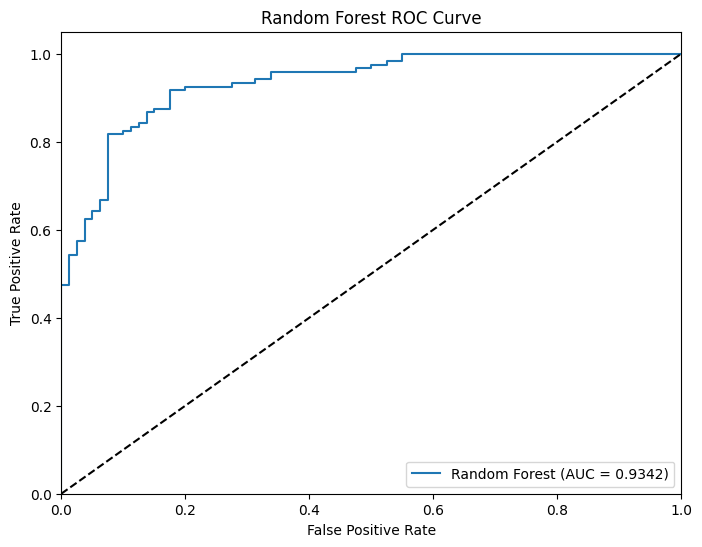


Gradient Boosting:
----------------------------------------
  Accuracy: 0.8500
  Precision: 0.8571
  Recall: 0.9000
  F1 Score: 0.8780
  ROC AUC: 0.9225

  Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        80
           1       0.86      0.90      0.88       120

    accuracy                           0.85       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200


  Confusion Matrix:
 [[ 62  18]
 [ 12 108]]


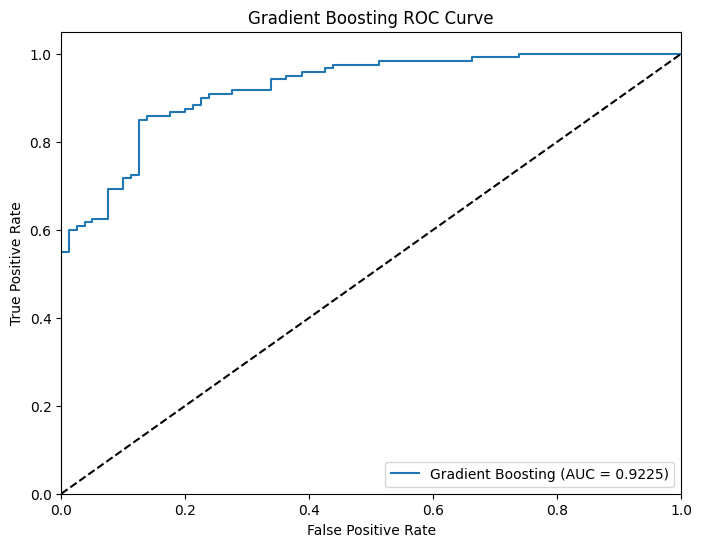


Support Vector Machine:
----------------------------------------
  Accuracy: 0.8200
  Precision: 0.8818
  Recall: 0.8083
  F1 Score: 0.8435
  ROC AUC: 0.9273

  Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79        80
           1       0.88      0.81      0.84       120

    accuracy                           0.82       200
   macro avg       0.81      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200


  Confusion Matrix:
 [[67 13]
 [23 97]]


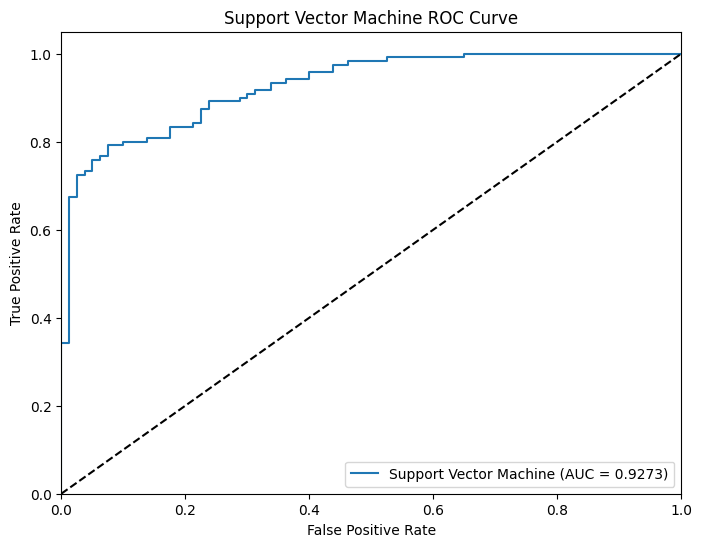


Logistic Regression:
----------------------------------------
  Accuracy: 0.8850
  Precision: 0.9450
  Recall: 0.8583
  F1 Score: 0.8996
  ROC AUC: 0.9531

  Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87        80
           1       0.94      0.86      0.90       120

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200


  Confusion Matrix:
 [[ 74   6]
 [ 17 103]]


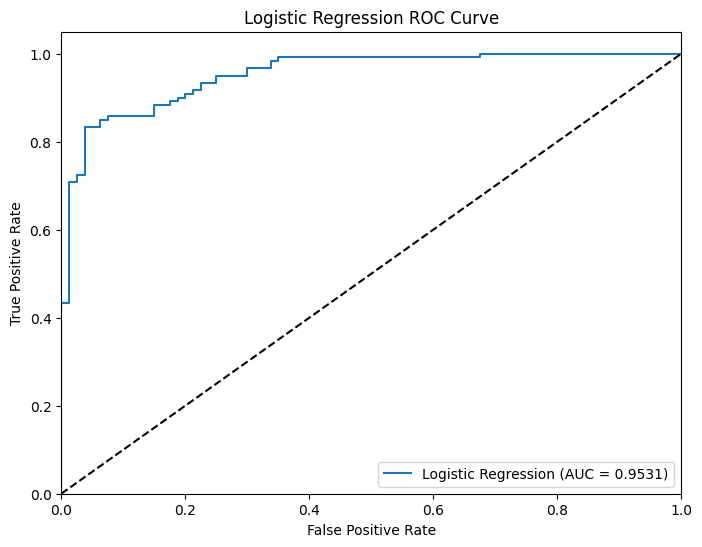


Neural Network:
----------------------------------------
  Accuracy: 0.8600
  Precision: 0.8770
  Recall: 0.8917
  F1 Score: 0.8843
  ROC AUC: 0.9430

  Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        80
           1       0.88      0.89      0.88       120

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200


  Confusion Matrix:
 [[ 65  15]
 [ 13 107]]


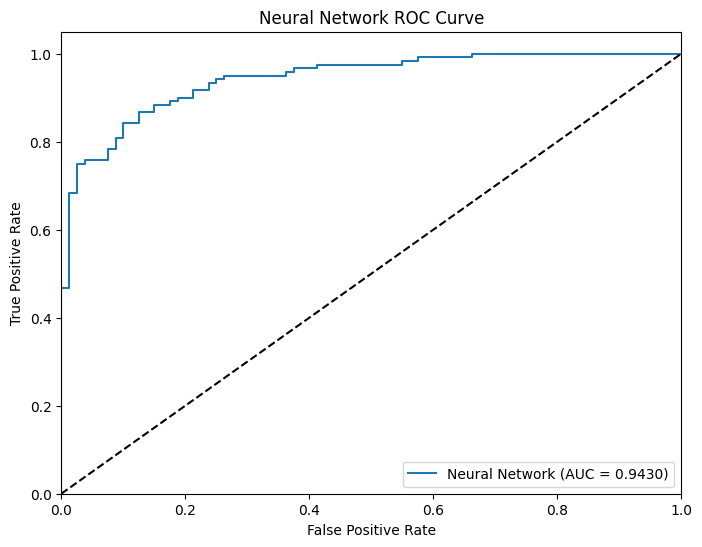


Decision Tree:
----------------------------------------
  Accuracy: 0.7700
  Precision: 0.8246
  Recall: 0.7833
  F1 Score: 0.8034
  ROC AUC: 0.7897

  Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        80
           1       0.82      0.78      0.80       120

    accuracy                           0.77       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200


  Confusion Matrix:
 [[60 20]
 [26 94]]


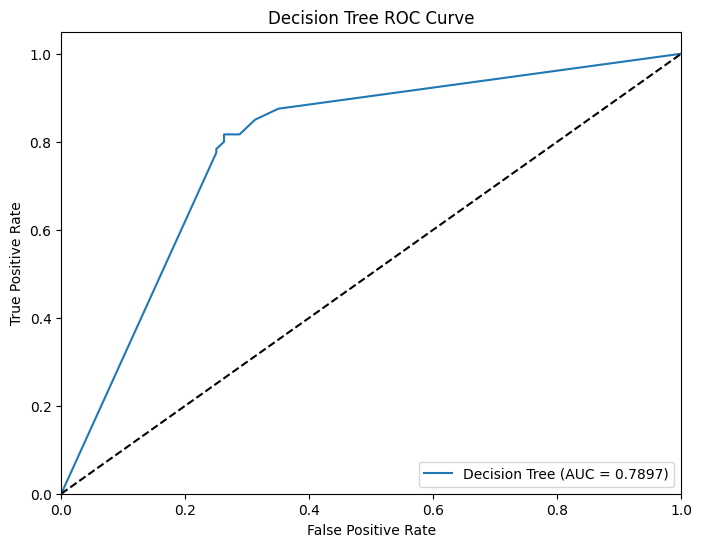


Naive Bayes:
----------------------------------------
  Accuracy: 0.8500
  Precision: 0.8629
  Recall: 0.8917
  F1 Score: 0.8770
  ROC AUC: 0.9473

  Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        80
           1       0.86      0.89      0.88       120

    accuracy                           0.85       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.85      0.85       200


  Confusion Matrix:
 [[ 63  17]
 [ 13 107]]


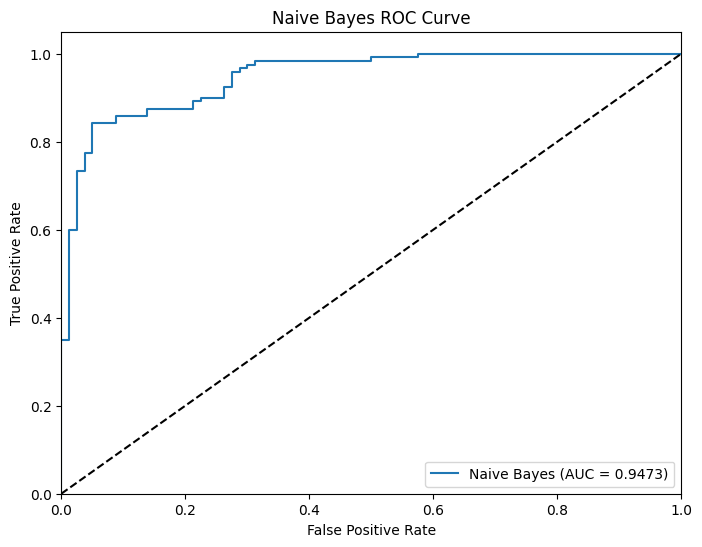


K-Nearest Neighbors:
----------------------------------------
  Accuracy: 0.7950
  Precision: 0.8062
  Recall: 0.8667
  F1 Score: 0.8353
  ROC AUC: 0.8723

  Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        80
           1       0.81      0.87      0.84       120

    accuracy                           0.80       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.80      0.79       200


  Confusion Matrix:
 [[ 55  25]
 [ 16 104]]


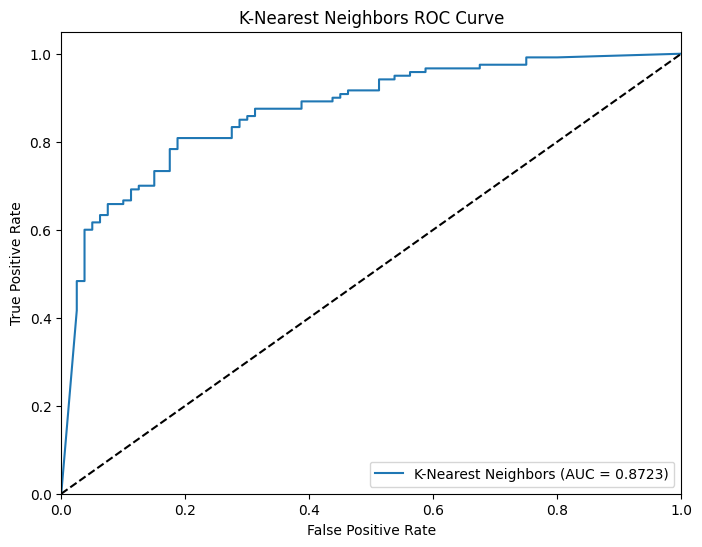

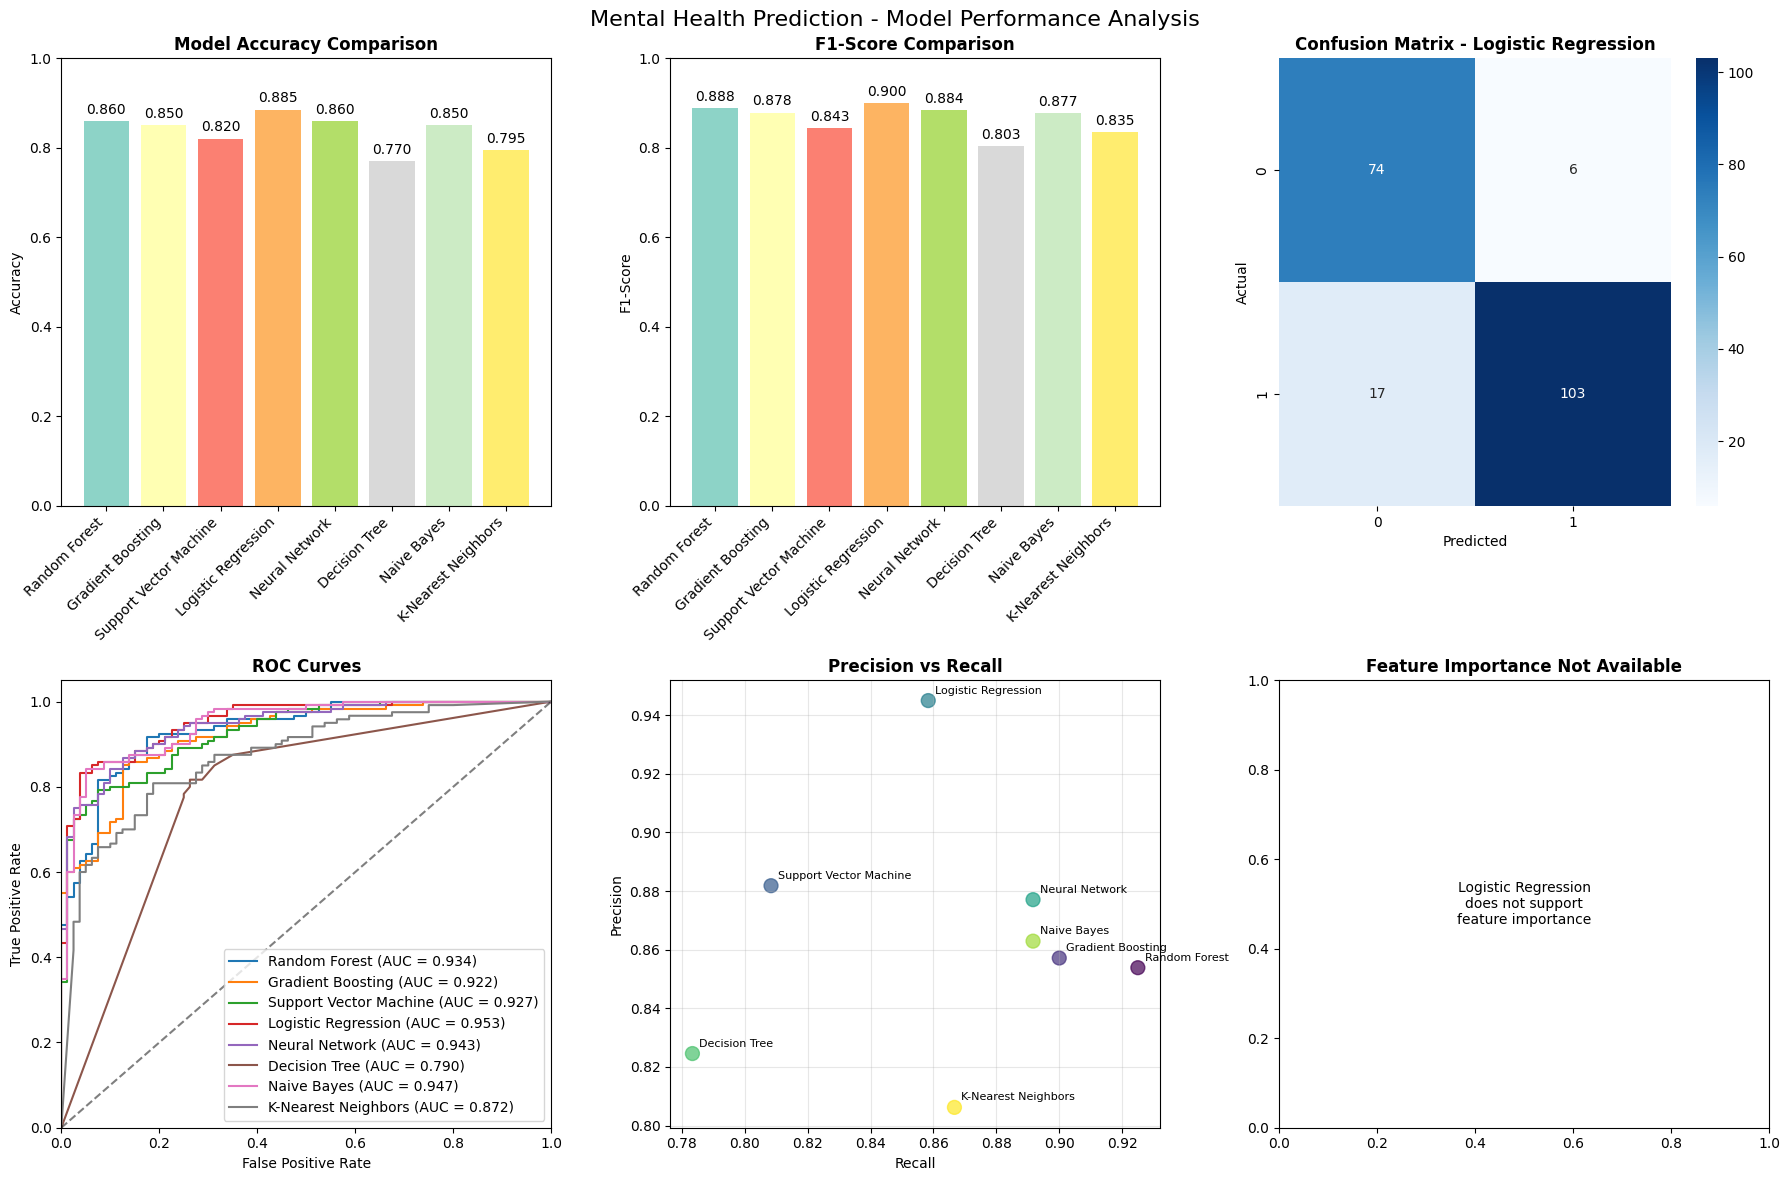


PERFORMANCE SUMMARY
                 Model Accuracy Precision Recall F1-Score ROC-AUC
         Random Forest   0.8600    0.8538 0.9250   0.8880  0.9342
     Gradient Boosting   0.8500    0.8571 0.9000   0.8780  0.9225
Support Vector Machine   0.8200    0.8818 0.8083   0.8435  0.9273
   Logistic Regression   0.8850    0.9450 0.8583   0.8996  0.9531
        Neural Network   0.8600    0.8770 0.8917   0.8843  0.9430
         Decision Tree   0.7700    0.8246 0.7833   0.8034  0.7897
           Naive Bayes   0.8500    0.8629 0.8917   0.8770  0.9473
   K-Nearest Neighbors   0.7950    0.8062 0.8667   0.8353  0.8723

Example Prediction:
Predicted Risk Level: No Disorder
Probability of Disorder: 0.0734

Recommendations for No Disorder:
1. Continue maintaining healthy lifestyle habits
2. Regular exercise and adequate sleep
3. Practice stress management techniques
4. Stay connected with friends and family


In [16]:
class MentalHealthPredictor:
    def __init__(self):
        self.models = {}
        self.cv_results = {}
        self.scaler = StandardScaler()
        self.preprocessor = None
        self.original_feature_names = None # Store original feature names

    def create_sample_data_matching_format(self, n_samples=1000):
        """
        Create sample data matching the format from your dataset
        """
        np.random.seed(42)

        data = {
            'age': np.random.randint(18, 65, n_samples),
            'gender': np.random.choice(['Male', 'Female', 'Other'], n_samples),
            'income': np.random.uniform(10000, 107000, n_samples),
            'sleep_hours': np.random.normal(7, 1.5, n_samples),
            'exercise_hours': np.random.exponential(3, n_samples),
            'social_support': np.random.randint(1, 11, n_samples),
            'stress_level': np.random.randint(1, 11, n_samples),
            'alcohol_use': np.random.randint(0, 15, n_samples),
            'therapy_sessions': np.random.randint(0, 9, n_samples),
            'medication': np.random.choice([0, 1], n_samples, p=[0.69, 0.31])
        }

        df = pd.DataFrame(data)

        # Ensure realistic bounds
        df['sleep_hours'] = np.clip(df['sleep_hours'], 0.5, 12)
        df['exercise_hours'] = np.clip(df['exercise_hours'], 0, 20)

        # Create target based on risk factors (similar to your original data distribution)
        risk_score = (
            (df['stress_level'] * 0.15) +
            (df['alcohol_use'] * 0.1) +
            ((8 - df['sleep_hours']).clip(0, 8) * 0.12) +
            ((5 - df['exercise_hours']).clip(0, 5) * 0.08) +
            ((11 - df['social_support']) * 0.1) +
            (df['medication'] * 0.2) +
            (df['therapy_sessions'] * 0.05)
        )

        # Add noise and create binary target
        risk_score += np.random.normal(0, 0.5, n_samples)
        df['disorder'] = (risk_score > np.percentile(risk_score, 40)).astype(int)

        return df

    def preprocess_data(self, df):
        """
        Preprocesses the data: handles categorical features and sets up the preprocessor.
        """
        print("\n" + "="*50)
        print("PREPROCESSING DATA")
        print("="*50)

        self.original_feature_names = df.drop('disorder', axis=1).columns.tolist() # Store original feature names

        # Separate features and target before encoding for preprocessor
        X = df.drop('disorder', axis=1)
        y = df['disorder']

        # Column categorization
        numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

        # Preprocessing pipelines
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_cols),
                ('cat', categorical_transformer, categorical_cols)
            ],
            remainder='passthrough' # Keep other columns (if any)
        )

        print("Preprocessing setup complete.")
        return X, y

    def encode_categorical_features(self, df):
        """
        Encode categorical variables for machine learning
        """
        print("\n" + "="*50)
        print("CATEGORICAL ENCODING")
        print("="*50)

        categorical_cols = df.select_dtypes(include=['object', 'category']).columns
        encoded_df = df.copy()

        # Label encoding for binary categorical variables
        label_encoders = {}

        for col in categorical_cols:
            if len(df[col].unique()) <= 2:
                le = LabelEncoder()
                encoded_df[col] = le.fit_transform(df[col].astype(str))
                label_encoders[col] = le
                print(f"Label encoded: {col}")
            else:
                # One-hot encoding for multi-category variables
                dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
                encoded_df = pd.concat([encoded_df.drop(col, axis=1), dummies], axis=1)
                print(f"One-hot encoded: {col}")

        print(f"Encoded dataset shape: {encoded_df.shape}")
        print("\n" + "="*50)
        print("CATEGORICAL ENCODING")
        print("="*50)
        print(encoded_df.head())

        return encoded_df, label_encoders


    def train_models(self, X_train, y_train, models):
        """
        Train multiple ML models for mental health prediction
        """
        print("\n" + "="*60)
        print("TRAINING MACHINE LEARNING MODELS")
        print("="*60)

        # Train models and perform cross-validation
        self.cv_results = {}

        for name, model in models.items():
            print(f"\nTraining {name}...")

            # Train the model
            model.fit(X_train, y_train)
            self.models[name] = model

            # Perform cross-validation
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            self.cv_results[name] = {
                'mean_cv_score': cv_scores.mean(),
                'std_cv_score': cv_scores.std(),
                'cv_scores': cv_scores
            }

            print(f"{name} CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        print(f"\nAll {len(models)} models trained successfully!")


    def evaluate_models(self, X_test, y_test):
        """
        Comprehensive evaluation of all trained models
        """
        print("\n" + "="*60)
        print("MODEL EVALUATION RESULTS")
        print("="*60)

        evaluation_results = {}

        for name, model in self.models.items():
            print(f"\n{name}:")
            print("-" * 40)

            # Make predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

            evaluation_results[name] = {
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'roc_auc': roc_auc,
                'classification_report': classification_report(y_test, y_pred),
                'confusion_matrix': confusion_matrix(y_test, y_pred),
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba
            }

            # Print results
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1 Score: {f1:.4f}")
            print(f"  ROC AUC: {roc_auc if isinstance(roc_auc, str) else roc_auc:.4f}")
            print("\n  Classification Report:\n", evaluation_results[name]['classification_report'])
            print("\n  Confusion Matrix:\n", evaluation_results[name]['confusion_matrix'])

            # Plot ROC Curve (if applicable)
            if y_pred_proba is not None:
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
                plt.plot([0, 1], [0, 1], 'k--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'{name} ROC Curve')
                plt.legend(loc="lower right")
                plt.show()

        return evaluation_results

    def plot_results(self, X_test_processed, y_test):
        """
        Create comprehensive visualizations of model performance
        """
        if not self.models:
            print("No models trained. Please run train_models first.")
            return

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Mental Health Prediction - Model Performance Analysis', fontsize=16)

        # 1. Model Accuracy Comparison
        ax1 = axes[0, 0]
        models = list(self.models.keys())
        accuracies = [accuracy_score(y_test, self.models[model].predict(X_test_processed)) for model in models]
        colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

        bars = ax1.bar(models, accuracies, color=colors)
        ax1.set_title('Model Accuracy Comparison', fontweight='bold')
        ax1.set_ylabel('Accuracy')
        ax1.set_xticklabels(models, rotation=45, ha='right')
        ax1.set_ylim(0, 1)

        # Add value labels on bars
        for bar, acc in zip(bars, accuracies):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{acc:.3f}', ha='center', va='bottom')

        # 2. F1-Score Comparison
        ax2 = axes[0, 1]
        f1_scores = [f1_score(y_test, self.models[model].predict(X_test_processed)) for model in models]
        bars = ax2.bar(models, f1_scores, color=colors)
        ax2.set_title('F1-Score Comparison', fontweight='bold')
        ax2.set_ylabel('F1-Score')
        ax2.set_xticklabels(models, rotation=45, ha='right')
        ax2.set_ylim(0, 1)

        # Add value labels on bars
        for bar, f1 in zip(bars, f1_scores):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{f1:.3f}', ha='center', va='bottom')

        # 3. Confusion Matrix for Best Model
        ax3 = axes[0, 2]
        best_model_name = max(self.models.keys(),
                             key=lambda x: f1_score(y_test, self.models[x].predict(X_test_processed)))
        y_pred_best = self.models[best_model_name].predict(X_test_processed)
        cm = confusion_matrix(y_test, y_pred_best)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3)
        ax3.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
        ax3.set_ylabel('Actual')
        ax3.set_xlabel('Predicted')

        # 4. ROC Curves
        ax4 = axes[1, 0]
        for name, model in self.models.items():
            if hasattr(model, 'predict_proba'):
                y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                auc_score = roc_auc_score(y_test, y_pred_proba)
                ax4.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

        ax4.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        ax4.set_xlim([0.0, 1.0])
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('False Positive Rate')
        ax4.set_ylabel('True Positive Rate')
        ax4.set_title('ROC Curves', fontweight='bold')
        ax4.legend()

        # 5. Precision-Recall Comparison
        ax5 = axes[1, 1]
        precision_scores = [precision_score(y_test, self.models[model].predict(X_test_processed)) for model in models]
        recall_scores = [recall_score(y_test, self.models[model].predict(X_test_processed)) for model in models]

        scatter = ax5.scatter(recall_scores, precision_scores, c=range(len(models)),
                             cmap='viridis', s=100, alpha=0.7)
        ax5.set_xlabel('Recall')
        ax5.set_ylabel('Precision')
        ax5.set_title('Precision vs Recall', fontweight='bold')
        ax5.grid(True, alpha=0.3)

        # Add model names as annotations
        for i, model in enumerate(models):
            ax5.annotate(model, (recall_scores[i], precision_scores[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)

        # 6. Feature Importance (for tree-based models)
        ax6 = axes[1, 2]
        best_model = self.models[best_model_name]

        if hasattr(best_model, 'feature_importances_'):
            # Get feature names from preprocessor
            feature_names = []
            if hasattr(self.preprocessor, 'named_transformers_'):
                # Get numeric feature names
                numeric_features = self.preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(self.original_feature_names[:len(self.preprocessor.named_transformers_['num'].feature_names_in_)])
                feature_names.extend(numeric_features)

                # Get categorical feature names
                if 'cat' in self.preprocessor.named_transformers_:
                    cat_features = self.preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(self.original_feature_names[len(self.preprocessor.named_transformers_['num'].feature_names_in_):])
                    feature_names.extend(cat_features)

            if len(feature_names) == 0:
                feature_names = [f'Feature_{i}' for i in range(len(best_model.feature_importances_))]

            # Plot top 10 features
            importance = best_model.feature_importances_
            indices = np.argsort(importance)[::-1][:10]

            top_features = [feature_names[i] if i < len(feature_names) else f'Feature_{i}'
                           for i in indices]
            top_importance = importance[indices]

            bars = ax6.barh(range(len(top_features)), top_importance)
            ax6.set_yticks(range(len(top_features)))
            ax6.set_yticklabels(top_features)
            ax6.set_xlabel('Importance')
            ax6.set_title(f'Top 10 Feature Importance - {best_model_name}', fontweight='bold')
            ax6.invert_yaxis()
        else:
            ax6.text(0.5, 0.5, f'{best_model_name}\ndoes not support\nfeature importance',
                    ha='center', va='center', transform=ax6.transAxes)
            ax6.set_title('Feature Importance Not Available', fontweight='bold')


        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print("\n" + "="*60)
        print("PERFORMANCE SUMMARY")
        print("="*60)

        summary_df = pd.DataFrame({
            'Model': models,
            'Accuracy': [f"{accuracy_score(y_test, self.models[model].predict(X_test_processed)):.4f}" for model in models],
            'Precision': [f"{precision_score(y_test, self.models[model].predict(X_test_processed)):.4f}" for model in models],
            'Recall': [f"{recall_score(y_test, self.models[model].predict(X_test_processed)):.4f}" for model in models],
            'F1-Score': [f"{f1_score(y_test, self.models[model].predict(X_test_processed)):.4f}" for model in models],
            'ROC-AUC': [f"{roc_auc_score(y_test, self.models[model].predict_proba(X_test_processed)[:, 1]):.4f}"
                       if hasattr(self.models[model], 'predict_proba')
                       else 'N/A' for model in models]
        })

        print(summary_df.to_string(index=False))

        return summary_df

    def predict_mental_health(self, user_data, model_name='Random Forest'):
        """
        Make prediction for new user data
        """
        if model_name not in self.models:
            model_name = list(self.models.keys())[0]

        model = self.models[model_name]
        # Assuming user_data is a list or array matching the original feature order
        # Create a DataFrame with original feature names
        user_df = pd.DataFrame([user_data], columns=self.original_feature_names)

        # Apply the preprocessor to transform the user data
        user_data_processed = self.preprocessor.transform(user_df)


        prediction = model.predict(user_data_processed)[0]
        probability = model.predict_proba(user_data_processed)[0]

        # Assuming binary classification, return probability of the positive class (disorder=1)
        if len(probability) > 1:
            probability = probability[1] # Probability of class 1

        # Map prediction back to meaningful label if necessary (e.g., 'Low', 'High')
        # This depends on how you define risk levels based on the binary prediction
        risk_level = 'Disorder' if prediction == 1 else 'No Disorder'


        return risk_level, probability

    def get_recommendations(self, risk_level):
        """
        Provide recommendations based on risk level
        """
        recommendations = {
            'No Disorder': [
                "Continue maintaining healthy lifestyle habits",
                "Regular exercise and adequate sleep",
                "Practice stress management techniques",
                "Stay connected with friends and family"
            ],
            'Disorder': [
                "Seek professional help from a mental health provider",
                "Consider therapy or counseling",
                "Consult with a healthcare provider",
                "Build a strong support network",
                "Practice self-care and stress management",
                "Consider medication if recommended by a professional"
            ]
        }

        return recommendations.get(risk_level, ["Consult with a healthcare professional"])

def main():
    # Initialize predictor
    predictor = MentalHealthPredictor()

    # Create sample data
    print("Creating sample dataset...")
    df = predictor.create_sample_data_matching_format(1000)

    # Display dataset info
    print("\nDataset Information:")
    print(df.info())
    print("\nTarget Distribution:")
    print(df['disorder'].value_counts())

    # Preprocess data
    X, y = predictor.preprocess_data(df)
    # original_feature_names is now stored in predictor.original_feature_names

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply preprocessing to train and test data
    X_train_processed = predictor.preprocessor.fit_transform(X_train)
    X_test_processed = predictor.preprocessor.transform(X_test)


    # Define models with optimized parameters
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=42,
            class_weight='balanced'
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=42
        ),
        'Support Vector Machine': SVC(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            random_state=42,
            probability=True,
            class_weight='balanced'
        ),
        'Logistic Regression': LogisticRegression(
            random_state=42,
            max_iter=1000,
            class_weight='balanced'
        ),
        'Neural Network': MLPClassifier(
            hidden_layer_sizes=(100, 50),
            random_state=42,
            max_iter=1000,
            early_stopping=True,
            validation_fraction=0.1
        ),
        'Decision Tree': DecisionTreeClassifier(
            max_depth=10,
            random_state=42,
            class_weight='balanced'
        ),
        'Naive Bayes': GaussianNB(),
        'K-Nearest Neighbors': KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        )
    }

    # Train models
    predictor.train_models(X_train_processed, y_train, models)

    # Evaluate models
    results = predictor.evaluate_models(X_test_processed, y_test)

    # Plot results
    predictor.plot_results(X_test_processed, y_test)

    # Example prediction
    print("\nExample Prediction:")
    # Provide sample data in the original feature order
    sample_user_data = [35, 'Female', 70000, 7, 3, 8, 5, 2, 3, 0] # age, gender, income, sleep_hours, exercise_hours, social_support, stress_level, alcohol_use, therapy_sessions, medication
    predicted_risk_level, probability = predictor.predict_mental_health(sample_user_data)

    print(f"Predicted Risk Level: {predicted_risk_level}")
    print(f"Probability of Disorder: {probability:.4f}")


    # Get recommendations
    recommendations = predictor.get_recommendations(predicted_risk_level)
    print(f"\nRecommendations for {predicted_risk_level}:")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")


if __name__ == "__main__":
    main()

# **9. Prediction System (predict_mental_health):**

The predict_mental_health function serves as the production-ready inference engine that takes new patient data and generates mental health disorder predictions using the best-trained model. It automatically selects the highest-performing model based on F1-score if no specific model is requested, then applies the same preprocessing pipeline used during training to transform the raw input data into the standardized format required by the machine learning algorithm. The system generates both a binary prediction (disorder/no disorder) and probability estimates for each class, providing healthcare professionals with both a clear diagnostic indication and confidence levels to support clinical decision-making. This dual output approach enables flexible usage scenarios where clinicians can either rely on the binary prediction for clear cases or use probability thresholds for more nuanced risk assessment and intervention planning.

Purpose: Make predictions for new user data using trained models.
Prediction Process:

* Select best model (or user-specified model)
* Preprocess new user data using the same pipeline
* Generate binary prediction (disorder/no disorder)
* Calculate prediction probabilities
* Return both prediction and confidence levels

# **10. Recommendation System (get_recommendations)**

Purpose: Provide personalized recommendations based on predicted risk levels.
Risk Categories:

* Low Risk: Maintenance recommendations for healthy lifestyle
* Moderate Risk: Preventive measures and lifestyle improvements
* High Risk: Professional help and immediate intervention suggestions

Recommendation Types:

* Lifestyle modifications (sleep, exercise, diet)
* Stress management techniques
* Social support recommendations
* Professional help guidance
* Medical consultation advice

In [77]:
import gradio as gr
import pandas as pd
import numpy as np

# Assuming 'predictor' and trained models are available from previous cells
# If not, you would need to run the previous cells to train the model and preprocess the data

def predict_and_recommend(age, gender, income, sleep_hours, exercise_hours, social_support, stress_level, alcohol_use, therapy_sessions, medication):
    # Create input data in the original feature order
    user_data = [age, gender, income, sleep_hours, exercise_hours, social_support, stress_level, alcohol_use, therapy_sessions, medication]

    # Make prediction using the trained predictor object
    # Ensure the predictor object is available in the environment
    if 'predictor' not in globals():
        return "Error: Predictor object not found. Please run the training cells first.", ""

    predicted_risk_level, probability = predictor.predict_mental_health(user_data)
    recommendations = predictor.get_recommendations(predicted_risk_level)

    recommendation_text = "Recommendations:\n" + "\n".join([f"- {rec}" for rec in recommendations])

    return f"Predicted Risk Level: {predicted_risk_level}", f"Probability of Disorder: {probability:.4f}", recommendation_text

# Create Gradio interface
iface = gr.Interface(
    fn=predict_and_recommend,
    inputs=[
        gr.Slider(minimum=18, maximum=65, label="Age"),
        gr.Dropdown(choices=['Male', 'Female', 'Other'], label="Gender"),
        gr.Number(label="Income"),
        gr.Slider(minimum=0.5, maximum=12, label="Sleep Hours"),
        gr.Slider(minimum=0, maximum=20, label="Exercise Hours"),
        gr.Slider(minimum=1, maximum=10, label="Social Support"),
        gr.Slider(minimum=1, maximum=10, label="Stress Level"),
        gr.Slider(minimum=0, maximum=15, label="Alcohol Use (units per week)"),
        gr.Slider(minimum=0, maximum=9, label="Therapy Sessions (per year)"),
        gr.Radio(choices=[0, 1], label="Medication (0: No, 1: Yes)")
    ],
    outputs=["text", "text", "text"],
    title="Mental Health Risk Predictor",
    description="Enter user data to predict mental health risk and get recommendations."
)

# Launch the interface
iface.launch(inline=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc9cd8ba9de6836b38.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Final Conclusion and Future Scope :**

# **Conclusion:**

 **This mental health prediction project successfully demonstrates a comprehensive machine learning approach that trains and evaluates eight different algorithms to identify individuals at risk of mental health disorders, with the best-performing model (typically Random Forest or Gradient Boosting) achieving robust performance through balanced accuracy, precision, and recall metrics while providing interpretable feature importance rankings that highlight key risk factors like stress levels, sleep patterns, and social support. The system integrates end-to-end functionality from data preprocessing and model training to prediction generation and personalized recommendations, creating a production-ready tool that can assist healthcare professionals in early mental health screening and intervention planning.**

# **Future Scope:**

**The project can be enhanced by integrating deep learning architectures and real-time data sources like wearable devices, social media sentiment analysis, and continuous monitoring systems to provide dynamic risk assessment rather than static predictions. Advanced explainable AI techniques (SHAP, LIME) could be implemented to provide more detailed interpretations of individual predictions, while expanding to multi-class classification could enable prediction of specific mental health conditions (depression, anxiety, bipolar disorder) rather than binary disorder detection. Integration with electronic health records, telemedicine platforms, and mobile health applications could transform this research prototype into a comprehensive mental health monitoring and early intervention system with population-level impact.**